In [1]:
# Load the extension and set it to autoreload all modules.
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from general.spectrogram import SpectrogramLoader
from general.keras import Trainer
from svd.dataloader import SVDDataLoader
from svd.preprocessor import SVDPreprocessor
from svd.model import SVDModel

In [3]:
spectrogram_loader = SpectrogramLoader()
data_loader = SVDDataLoader(spectrogram_loader)
preprocessor = SVDPreprocessor()
trainer = Trainer(SVDModel())

In [4]:
from general.keras import prepare_session
prepare_session()

In [5]:
d = data_loader.load()
print('Loading: done!')

preprocessor.preprocess(d)
print('Preprocessing: done!')

history = trainer.fit_model(d, early_stop=False)

Loading: done!
Preprocessing: done!
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1689 samples, validate on 564 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1689/1689 [==============================] - 5s 3ms/sample - loss: 0.8003 - acc: 0.6448 - val_loss: 0.6404 - val_acc: 0.6631
Epoch 2/100
1689/1689 [==============================] - 2s 1ms/sample - loss: 0.6428 - acc: 0.6649 - val_loss: 0.6254 - val_acc: 0.7394
Epoch 3/100
1689/1689 [==============================] - 2s 1ms/sample - loss: 0.6118 - acc: 0.6909 - val_loss: 0.6050 - val_acc: 0.7340
Epoch 4/100
1689/1689 [==============================] - 2s 1ms/sample - loss: 0.5837 - acc: 0.7010 - val_loss: 0.6040 - val_acc: 0.7216
Epoch 5/100
1689/1689 [==============================] - 2s 1ms/sample - loss: 0.5976 - acc: 0.6945 - val_loss: 0.5836 - val_acc: 0.71

1689/1689 [==============================] - 2s 983us/sample - loss: 0.1636 - acc: 0.9390 - val_loss: 1.5986 - val_acc: 0.7465
Epoch 53/100
1689/1689 [==============================] - 2s 976us/sample - loss: 0.1863 - acc: 0.9331 - val_loss: 1.6302 - val_acc: 0.7110
Epoch 54/100
1689/1689 [==============================] - 2s 969us/sample - loss: 0.1301 - acc: 0.9538 - val_loss: 1.7177 - val_acc: 0.7110
Epoch 55/100
1689/1689 [==============================] - 2s 969us/sample - loss: 0.1375 - acc: 0.9473 - val_loss: 1.5212 - val_acc: 0.6897
Epoch 56/100
1689/1689 [==============================] - 2s 1ms/sample - loss: 0.1118 - acc: 0.9627 - val_loss: 1.5349 - val_acc: 0.7447
Epoch 57/100
1689/1689 [==============================] - 2s 983us/sample - loss: 0.1224 - acc: 0.9550 - val_loss: 1.8740 - val_acc: 0.7340
Epoch 58/100
1689/1689 [==============================] - 2s 980us/sample - loss: 0.1300 - acc: 0.9497 - val_loss: 1.8595 - val_acc: 0.6950
Epoch 59/100
1689/1689 [===========

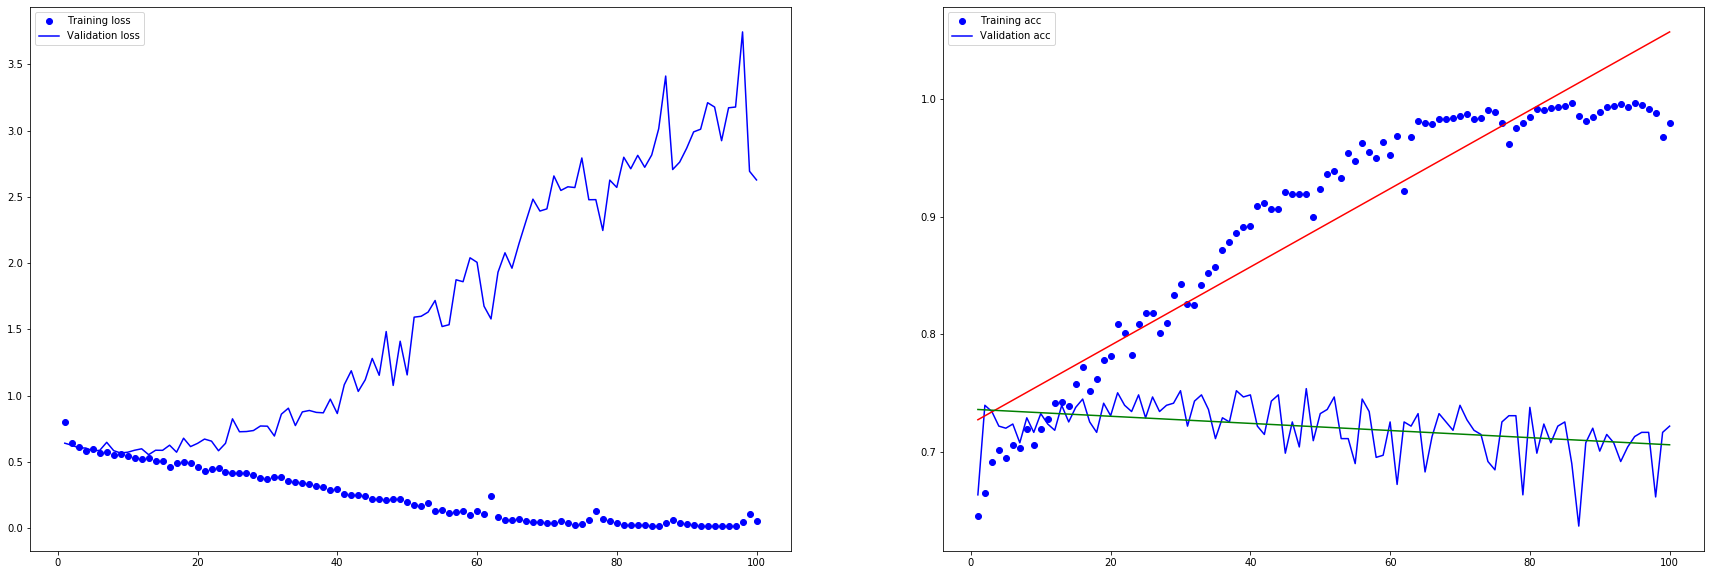

In [6]:
from general.visualization import visualize_history

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(30, 10))
visualize_history(fig, axs, 0, history)

In [7]:
trainer.evaluate(d)

564/564 [==============================] - 1s 970us/sample - loss: 0.5900 - acc: 0.7252


[0.5900093536850408, 0.7251773]

In [9]:
trainer.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 32, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 32, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 32, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 16, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 16, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 16, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 8, 128)        0         
__________